<a href="https://colab.research.google.com/github/nagamamo/UofMalaya_Seminar/blob/main/2_Python_for_Finance%3A_Modern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2 Python for Finance: Modern Portfolio Theory**



The **mean-variance approach** originates from the idea that the average return and its variance (volatility) of the assets used to derive the optimal asset composition.

This theory shows how, when holding multiple assets, the composition that provides the **optimal return** and **risk** is calculated.

In short, **average (expected) return** is the **mean (expected) value** of the past (future) rate of return in asset prices.


It is expected that this past rate of return distribution will be similarly scattered in the future under a certain probability distribution. The expected return is expressed as the "**expected return**."


# 2.1  Libraries for Effcient Frontier



To derive the **efficient frontier** of two assets, we will use the following five libraries that we have already learned last time.

In [ ]:
#[1] Import Libraries
from pandas_datareader import data
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.2  Data Retrieval

 In this example, we acquire daily stock price data of Hong Kong H-share companies **Tencent (700.HK)** and **Zhejiang Geely Automobile Holdings (175.HK)**.

In [ ]:
#[2] Retrieval of Daily Stock Price Data
tickers=['700.HK','175.HK']
start=datetime.date(2019,1,1)
end=datetime.date(2021,12,31)#
data=data.DataReader(tickers,'stooq',start=start,end=end).sort_values(by='Date',ascending=True)

# 2.3  Data Pre-Processing


Of the acquired data, only the closing price (Close) is stored in a new data frame **df**.

In the second line, the original data are converted to the returns of the closing prices stored in the dataframe **df** and the **missing values** are removed.


In [ ]:
#[3] Data Pre-Processing
df=data.Close
df=df.pct_change().dropna()

# 2.4  Mean and Variance



The first line calculates the **average returns** of the stock prices.
The second line calculates the **variances of the stock price returns**.
The third line calculates the **covariance of the two stock price returns** of 700.HK and 175.HK.

In [ ]:
#[4] Mean and Variance
Rp=df.mean()*250
VAR_Rp=df.var()*250
Cov_Rp=df['700.HK'].cov(df['175.HK'])*250

# 2.5  Portfolio Returns by Asset Allocation



Using  **np.arange()** to generate a numerical value from the minimum A% to the maximum C% in steps of B%, and name this data as ***weight***.

In the second line, use this ***weight*** to increase the value by 1% from 0% (100%) to 100% to calculate the 101 patterns of **expected return** combinations.


In [ ]:
#[5] Portfolio Returns by Asset Composition
weights=np.arange(0,1.01,0.01)
for i in np.arange(0,1.01,0.01):
  E_Rp=weights*Rp["700.HK"]+(1-weights)*Rp["175.HK"]

# 2.6 Standard Diviations by Asset Allocation



Using varaible ***weight*** generated on the previous page, increase the ratio by 1% from 0% (100%) to 100% and calculate the variance by combining 101 patterns of two assets.

In the second line, convert this variance to standard deviation using **np.sqrt()**.


In [ ]:
#[6] Portfolio Risks by Asset Allocation
for i in np.arange(0,1.01,0.01):
  Var_Rp2=weights*weights*VAR_Rp["700.HK"]+(1-weights)*(1-weights)*VAR_Rp["175.HK"]+2*weights*(1-weights)*Cov_Rp
Sigma_Rp=np.sqrt(Var_Rp2)

# 2.7 Efficient Frontier: Visualization

In [ ]:
#[7]Efficient Frontier: Visualization
plt.scatter(Sigma_Rp,E_Rp)
plt.xlabel("Risk")
plt.ylabel("Expected Return")

# 2.8  Sharpe Ratio

Next, following the derive of the efficient frontier, we derive the **capital market line (CML)**.

Using the source code below, we were able to draw the **efficient frontier**. However, which ratio to be choosen from all the asset allocations should be decided.

Here, we first need the interest rate of the **risk-free asset**, so in the first line, we give the interest rate of the **10-year Hong Kong dollar bond yield**.

When calculating the **average return** and **standard deviation**, the return and risk values ​for each asset ratio using **numpy** are stored in a new pandas data frame **df1**.

Using this dataframe, we calculate the **Sharpe ratio (s_ratio)**. Using **np.amax()**, it is possible to extract the highest Sharpe ratio from this data **(max_sr)**.

In [ ]:
#[8] Sharpe Ratio
rf=0.03157
columns=['Ratio']
mean_variance=pd.DataFrame(data=weights, columns=columns)
mean_variance['Risk'] = pd.DataFrame(Sigma_Rp)
mean_variance['Expected_Returns'] = pd.DataFrame(E_Rp)
mean_variance['Sharp_Ratio'] = pd.DataFrame((E_Rp-rf)/Sigma_Rp)
s_ratio=(E_Rp-rf)/Sigma_Rp
max_sr=np.amax(s_ratio)
mean_variance


# 2.9 Optimal Asset Allocation

Next, using the **mean_variance** dataframe we created earlier, we save the asset composition ratio, standard deviation, and return of Tencent and Geely Automobile that maximizes the **Sharpe Ratio** using **loc[mean_variance['Sharp_Ratio'].idxmax()**].

We then extract the standard deviation **(optimal.iloc[1,0])** and average return **(optimal.iloc[2,0]**) values ​​at this time and name them new variables ***opt_risk*** and ***opt_return***, respectively.

In [ ]:
#[9] Optimal Asset Allocation
optimal=pd.DataFrame(mean_variance.loc[mean_variance['Sharp_Ratio'].idxmax()])
opt_risk=optimal.iloc[1,0] #
opt_return=optimal.iloc[2,0]
optimal

# 3.0 Capital Market Line and Efficient Frontier

Finally, we visualize the **capital market line (CML)**, which has risk (standard deviation) on the horizontal axis and expected return on the vertical axis, along with the efficient frontier.

The slope of the **capital market line (CML)** is consistent with the **Sharpe Ratio**.

The slope of the linear **capital market line (CML)** is constant, but the important point is that this **capital market line (CML**) always tangents the **efficient frontier**.

This **tangent point** is the **optimal asset allocation** of **Tencent (700.HK)** and G**eely Automobile (175.HK)** portfolio.

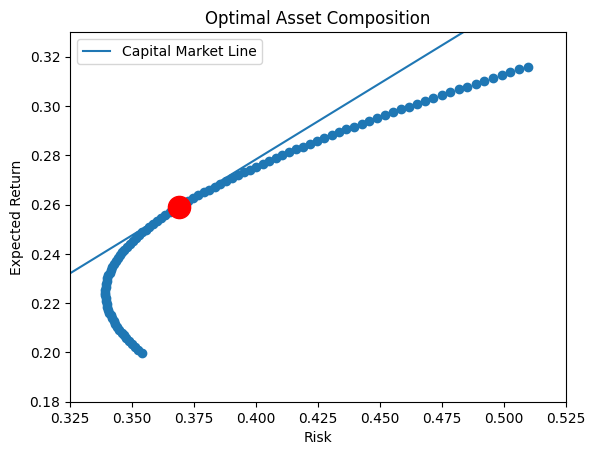

In [ ]:
#[10] Capital Market Line and Efficiant Frontier
def CML(rf,sharp_R,label):
    Risk = [x/100 for x in range(100)]
    ExpectedReturn = [rf+max_sr*x for x in Risk]
    plt.plot(Risk,ExpectedReturn,label=label)
    plt.xlabel("Risk")
    plt.xlim(0.325,0.525)
    plt.ylabel("Expected Return")
    plt.ylim(0.18,0.33)
    plt.title("Optimal Asset Composition")
    plt.plot(opt_risk,sharp_R,"ro",linestyle = "--",markersize=16)

CML(rf,opt_return,"Capital Market Line")
plt.scatter(Sigma_Rp,E_Rp)
plt.legend()
plt.show()